## Health Logs Dashboard for Monitoring Sport Players Performance

In this project, we'll utilize numerous datasets to track performance of players in a dashboard. We'll use [PMData: Sports Logging Dataset](https://www.kaggle.com/datasets/vlbthambawita/pmdata-a-sports-logging-dataset) which contains 5-month lifelog data of 16 participants collected from sensors and platforms: Fitbit Versa 2 smartwatch wristband, PMSys sports logging app, and Google Forms for data collection.  

The lifelogs in each player are preserved in folders of `pXX` (XX being the ID), inside we can find folders of: 

* `fitbit`
    * `calories.json` -- burned calories by last minute (cal), 
    * `distance.json` -- distance moved per minute (cm),
    * `exercise.json` -- details of each activity, from start-stop time to performance metrics for respective exercise (various units),
    * `heart_rate.json` -- heart beats per minute (bpm),
    * `lightly_active_minutes.json` -- lightly active minutes per day (min),
    * `moderately_active_minutes.json` -- moderately active minutes per day (min),
    * `resting_heart_rate.json` -- resting heart rate per day (bpm),
    * `sedentary_minutes.json` -- sedentary minutes per day (min),
    * `sleep_score.csv` -- trends in sleep patterns (various units),
    * `sleep.json` -- breakdown of sleep into periods of light, deep, REM sleeps, and time awake (mainly in min),
    * `time_in_heart_rate_zones.json` -- heart rates in minutes, grouped by 3 zones: fat burn (50-69% max HR), cardio (70-84% HR), and peak (85-100% HR) (min)
    * `very_active_minutes.json` -- very active minutes per day (min)
* `googledocs`
    * `reporting.csv` -- reports each day on: eaten meals (breakfast, lunch, dinner, and evening meal), weight, num of glasses drunk, and whether one has consumed alcohol (various units)
* `pmsys`
    * `injury.csv` -- date and time of injuries with corresponding locations and severity (various units)
    * `srpe.csv` -- data in training sessions as in the activity names, the perceived exertion (RPE), and duration (various units)
    * `wellness.csv` -- wellness parameters scored subjectively by day such as fatigue, mood, up to readiness (scales of 1-5 and 1-10) 
    * `food-images.zip` -- images of food consumed, captured by their own mobile cameras (images) (we're not using it for this project)
    
The author is intrigued in making the project since it could come in handy in several ways:
* Understanding data structure of sensor in health and wellness, in this case on FitBit sensor of biometrics and activity and PMSys for training load, injuries, and subjective wellness.
* Processing time-series health datasets into effective visualizations and supporting actionable insights on potential stakeholders--from sport teams up to research organizations.

P.S. For all directories with additional `Sample: p01` on it, keep in mind that the dataset is complex to wrangle, so we need to dissect on one player beforehand for better understanding and then applying it to all players.

In [1]:
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce

In [70]:
id_players = ['p' + str(player).zfill(2) for player in np.arange(1, 17)]
id_players

['p01',
 'p02',
 'p03',
 'p04',
 'p05',
 'p06',
 'p07',
 'p08',
 'p09',
 'p10',
 'p11',
 'p12',
 'p13',
 'p14',
 'p15',
 'p16']

### Calories

In [72]:
df_calories = pd.DataFrame()

for pXX in id_players:
    
    calories = pd.read_json(f"{pXX}/fitbit/calories.json")
    calories['pXX'] = pXX
    df_calories = pd.concat([df_calories, calories])

In [73]:
df_calories

,dateTime,value,pXX
0,2019-11-01 00:00:00,1.39,p01
1,2019-11-01 00:01:00,1.39,p01
2,2019-11-01 00:02:00,1.39,p01
3,2019-11-01 00:03:00,1.39,p01
4,2019-11-01 00:04:00,1.39,p01
...,...,...,...
218875,2020-03-31 23:55:00,1.17,p16
218876,2020-03-31 23:56:00,1.17,p16
218877,2020-03-31 23:57:00,1.17,p16
218878,2020-03-31 23:58:00,1.17,p16


In [82]:
df_calories['date']  = df_calories['dateTime'].dt.date
df_calories['yearmonth'] = df_calories['dateTime'].dt.month + df_calories['dateTime'].dt.year * 100
df_calories = df_calories.rename(columns={'value': 'calories'})

In [83]:
df_calories

,dateTime,calories,pXX,date,month,yearmonth
0,2019-11-01 00:00:00,1.39,p01,2019-11-01,11,201911
1,2019-11-01 00:01:00,1.39,p01,2019-11-01,11,201911
2,2019-11-01 00:02:00,1.39,p01,2019-11-01,11,201911
3,2019-11-01 00:03:00,1.39,p01,2019-11-01,11,201911
4,2019-11-01 00:04:00,1.39,p01,2019-11-01,11,201911
...,...,...,...,...,...,...
218875,2020-03-31 23:55:00,1.17,p16,2020-03-31,3,202003
218876,2020-03-31 23:56:00,1.17,p16,2020-03-31,3,202003
218877,2020-03-31 23:57:00,1.17,p16,2020-03-31,3,202003
218878,2020-03-31 23:58:00,1.17,p16,2020-03-31,3,202003


In [105]:
df_cals = df_calories.groupby(['pXX', 'yearmonth'])['calories'].sum().reset_index()
df_cals['yearmonth'] = pd.to_datetime(df_cals['yearmonth'], format="%Y%m")
df_cals

,pXX,yearmonth,calories
0,p01,2019-11-01,111362.50
1,p01,2019-12-01,115786.34
2,p01,2020-01-01,111865.62
3,p01,2020-02-01,107020.17
4,p01,2020-03-01,102322.52
...,...,...,...
74,p16,2019-11-01,60487.52
75,p16,2019-12-01,64432.29
76,p16,2020-01-01,61279.76
77,p16,2020-02-01,57676.82


C:\Users\acer\anaconda3\Lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


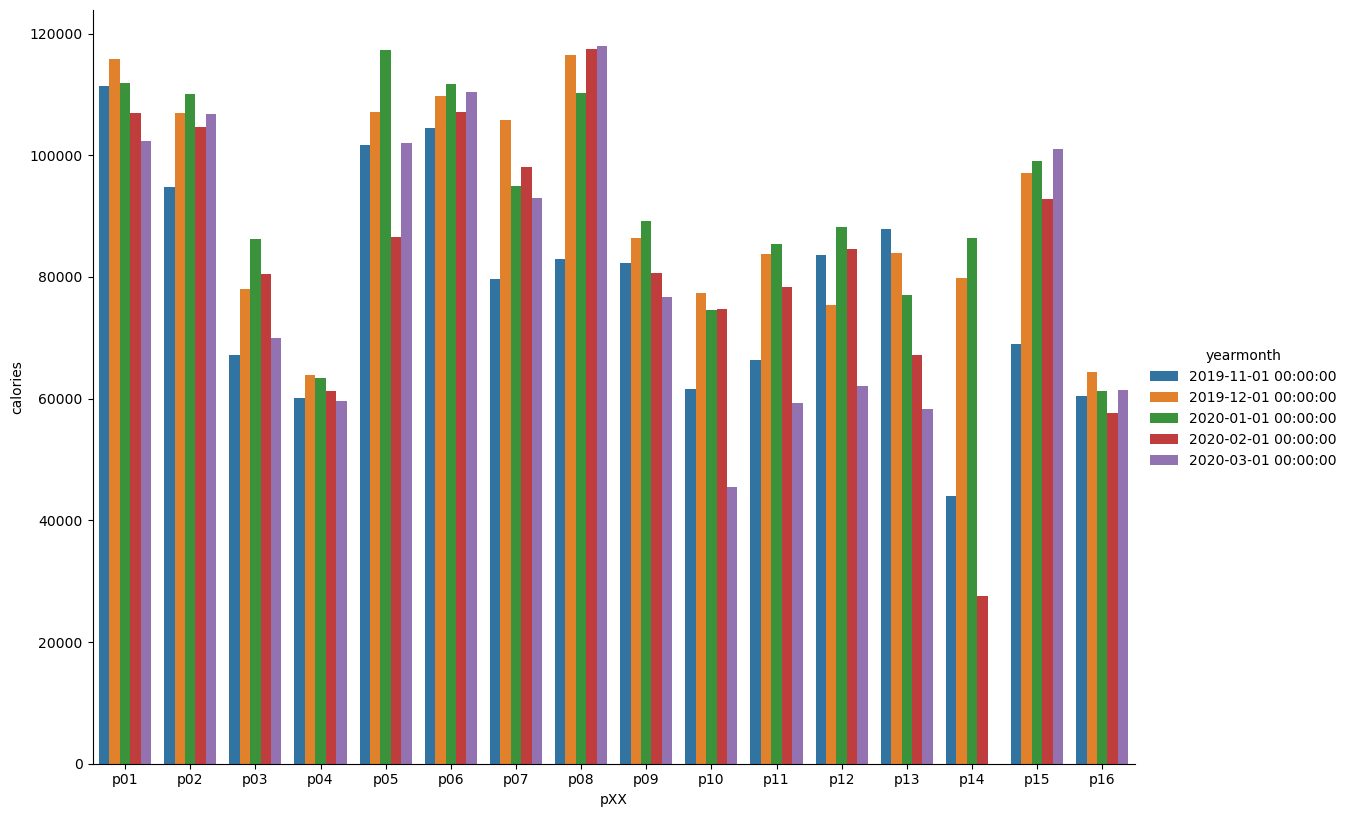

In [124]:
## Keep in mind: Violin plot, so that
# you could know if one player is active all the time
# or they would rather work it only at several days only

# (+) We could know the average calories they burn, and also the outliers.

sns.catplot(data=df_cals, x='pXX', y='calories', hue='yearmonth', 
    kind='bar', height=8.27, aspect=11.7/8.27)._legend.remove()

In [130]:
## Check for missing values:
df_cals_pivot = df_cals.pivot(values='calories', 
    index='yearmonth', columns='pXX').reset_index()
df_cals_pivot

pXX,yearmonth,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,p11,p12,p13,p14,p15,p16
0,2019-11-01,111362.50,94857.00,67181.75,60044.86,101696.33,104474.14,79702.47,83015.33,82312.92,61513.43,66397.63,83580.48,87831.47,44071.51,69039.01,60487.52
1,2019-12-01,115786.34,106874.00,77989.39,63911.44,107031.85,109808.67,105853.71,116469.73,86425.11,77380.77,83745.35,75394.59,84005.37,79880.34,97132.85,64432.29
2,2020-01-01,111865.62,110051.68,86206.50,63377.76,117349.85,111655.44,95028.76,110181.77,89213.68,74571.57,85377.65,88150.26,77055.94,86378.60,99141.77,61279.76
3,2020-02-01,107020.17,104604.26,80566.04,61309.16,86551.62,107090.91,98009.16,117494.27,80583.11,74745.39,78421.90,84640.57,67238.09,27607.43,92813.48,57676.82
4,2020-03-01,102322.52,106852.69,69982.39,59623.47,101948.05,110325.18,93028.28,117979.12,76751.38,45532.80,59274.88,62062.76,58233.63,NaN,101067.90,61361.71


In [88]:
## Player 14 recorded only 4 month of data. Recheck:
df_calories.loc[df_calories['pXX'] == 'p14']

,dateTime,calories,pXX,date,month,yearmonth
0,2019-11-13 00:00:00,1.13,p14,2019-11-13,11,201911
1,2019-11-13 00:01:00,1.13,p14,2019-11-13,11,201911
2,2019-11-13 00:02:00,1.13,p14,2019-11-13,11,201911
3,2019-11-13 00:03:00,1.13,p14,2019-11-13,11,201911
4,2019-11-13 00:04:00,1.13,p14,2019-11-13,11,201911
...,...,...,...,...,...,...
129595,2020-02-10 23:55:00,1.13,p14,2020-02-10,2,202002
129596,2020-02-10 23:56:00,1.13,p14,2020-02-10,2,202002
129597,2020-02-10 23:57:00,1.13,p14,2020-02-10,2,202002
129598,2020-02-10 23:58:00,1.13,p14,2020-02-10,2,202002


### Distance

In [118]:
df_distances = pd.DataFrame()

for pXX in id_players:
    
    distance = pd.read_json(f"{pXX}/fitbit/distance.json")
    distance['pXX'] = pXX
    df_distances = pd.concat([df_distances, distance])
    
df_distances['yearmonth'] = df_distances['dateTime'].dt.month + df_distances['dateTime'].dt.year * 100
df_distances = df_distances.rename(columns={'value': 'distances'})
df_distances['distances'] /= 100000 # Convert distances from cm to km

In [119]:
df_distances

,dateTime,distances,pXX,yearmonth
0,2019-11-01 00:00:00,0.0000,p01,201911
1,2019-11-01 00:01:00,0.0000,p01,201911
2,2019-11-01 00:02:00,0.0000,p01,201911
3,2019-11-01 00:03:00,0.0000,p01,201911
4,2019-11-01 00:04:00,0.0000,p01,201911
...,...,...,...,...
78567,2020-03-31 23:51:00,0.0000,p16,202003
78568,2020-03-31 23:52:00,0.0105,p16,202003
78569,2020-03-31 23:53:00,0.0000,p16,202003
78570,2020-03-31 23:55:00,0.0000,p16,202003


In [121]:
df_dists = df_distances.groupby(['pXX', 'yearmonth'])['distances'].sum().reset_index()
df_dists['yearmonth'] = pd.to_datetime(df_dists['yearmonth'], format="%Y%m")
df_dists

,pXX,yearmonth,distances
0,p01,2019-11-01,336.24688
1,p01,2019-12-01,347.80994
2,p01,2020-01-01,323.88826
3,p01,2020-02-01,301.99334
4,p01,2020-03-01,253.67848
...,...,...,...
74,p16,2019-11-01,56.01110
75,p16,2019-12-01,56.63860
76,p16,2020-01-01,36.37770
77,p16,2020-02-01,30.84900


C:\Users\acer\anaconda3\Lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
C:\Users\acer\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


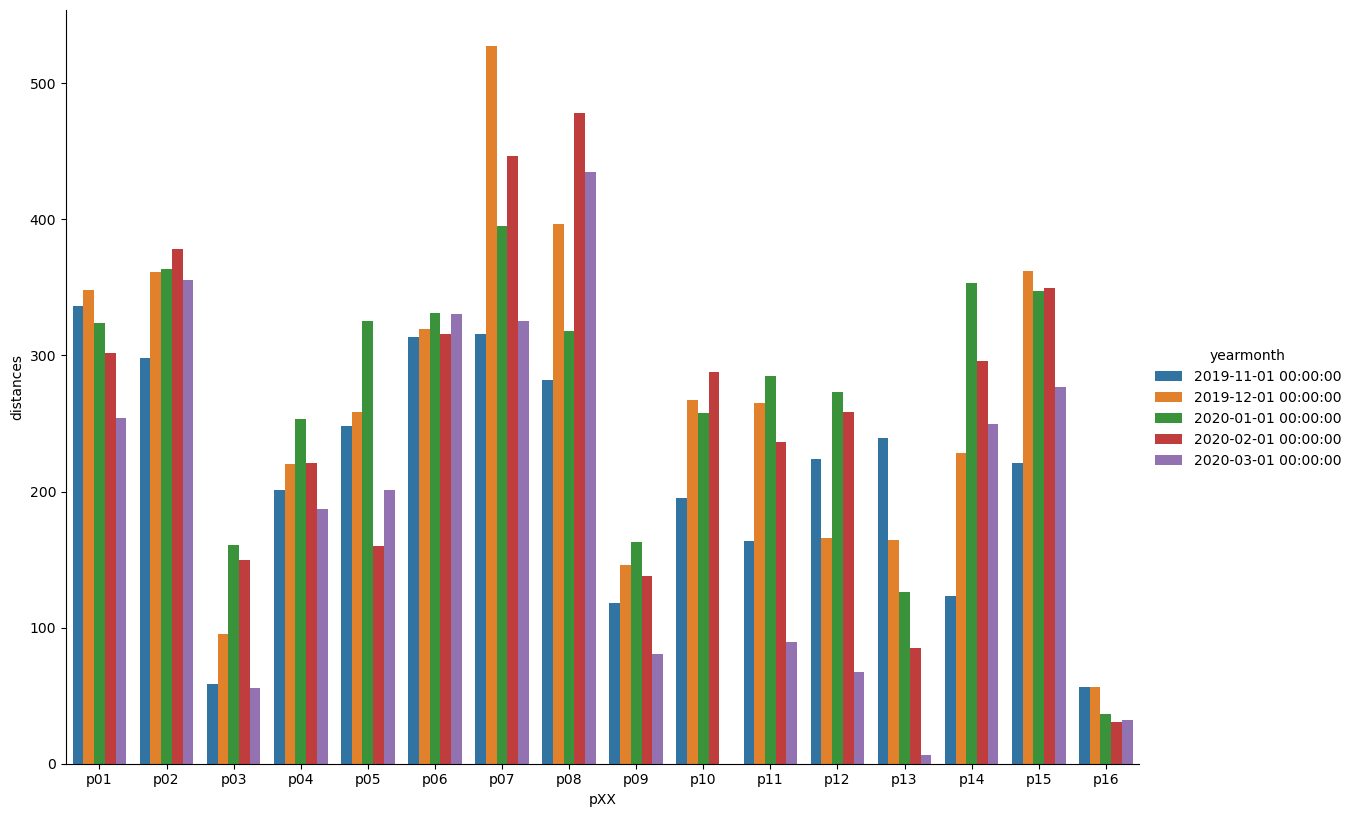

In [122]:
sns.catplot(data=df_dists, x='pXX', y='distances', hue='yearmonth', 
    kind='bar', height=8.27, aspect=11.7/8.27) #._legend.remove()

In [131]:
## Check for missing values:
df_dists_pivot = df_dists.pivot(values='distances', 
    index='yearmonth', columns='pXX').reset_index()
df_dists_pivot

pXX,yearmonth,p01,p02,p03,p04,p05,p06,p07,p08,p09,p10,p11,p12,p13,p14,p15,p16
0,2019-11-01,336.24688,298.24610,58.6183,201.37430,248.2763,313.7028,315.8475,281.6714,118.0547,195.5849,163.8833,224.0086,239.2025,123.3968,220.9263,56.0111
1,2019-12-01,347.80994,361.46199,95.6567,220.06422,258.5762,319.7245,527.4277,396.7740,146.2941,266.9120,265.3034,165.6635,164.2211,228.2940,362.2134,56.6386
2,2020-01-01,323.88826,363.84560,160.7410,253.11360,325.0883,330.8352,395.4368,318.0130,163.0870,257.9754,284.7697,273.4066,125.8124,353.1566,347.6322,36.3777
3,2020-02-01,301.99334,378.10780,150.0325,220.70790,160.1816,315.9721,446.2351,477.8101,138.2549,287.9133,236.2023,258.3557,85.3033,296.0242,349.5944,30.8490
4,2020-03-01,253.67848,355.34470,55.2747,186.97610,201.4354,330.5386,325.4313,434.7906,80.7644,NaN,89.0742,67.4493,6.1815,249.7185,276.9907,31.7597


### Exercise

#### Sample: `p01`

In [12]:
exercises = pd.read_json("p01/fitbit/exercise.json")
pd.options.display.max_columns  = 50
pd.options.display.max_colwidth = 1500

In [13]:
exercises.head()

,logId,activityName,activityTypeId,activityLevel,averageHeartRate,calories,duration,activeDuration,steps,logType,manualValuesSpecified,heartRateZones,lastModified,startTime,originalStartTime,originalDuration,elevationGain,hasGps,shouldFetchDetails,distance,distanceUnit,source,tcxLink,speed,pace,vo2Max
0,26451905128,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 0, 'name': 'lightly'}, {'minutes': 8, 'name': 'fairly'}, {'minutes': 14, 'name': 'very'}]",94,192,1331000,1331000,1878,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}, {'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 20}, {'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}, {'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}]",11/01/19 15:29:27,2019-11-01 14:56:32,11/01/19 14:56:32,1331000,24.384,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26455950499,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 1, 'name': 'lightly'}, {'minutes': 12, 'name': 'fairly'}, {'minutes': 23, 'name': 'very'}]",94,302,2202000,2202000,2786,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 4}, {'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 32}, {'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}, {'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}]",11/01/19 19:53:36,2019-11-01 19:03:11,11/01/19 19:03:11,2202000,27.432,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26467488515,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 0, 'name': 'lightly'}, {'minutes': 11, 'name': 'fairly'}, {'minutes': 30, 'name': 'very'}]",98,354,2458000,2458000,3035,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 0}, {'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 41}, {'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}, {'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}]",11/02/19 14:31:32,2019-11-02 13:26:38,11/02/19 13:26:38,2458000,21.336,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26520401069,Walk,90013,"[{'minutes': 0, 'name': 'sedentary'}, {'minutes': 1, 'name': 'lightly'}, {'minutes': 7, 'name': 'fairly'}, {'minutes': 9, 'name': 'very'}]",97,145,1024000,1024000,1284,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}, {'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 16}, {'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}, {'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}]",11/04/19 21:56:40,2019-11-04 21:22:08,11/04/19 21:22:08,1024000,21.336,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26538035127,Walk,90013,"[{'minutes': 3, 'name': 'sedentary'}, {'minutes': 13, 'name': 'lightly'}, {'minutes': 0, 'name': 'fairly'}, {'minutes': 0, 'name': 'very'}]",93,121,973000,973000,1065,auto_detected,"{'calories': False, 'distance': False, 'steps': False}","[{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 3}, {'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 13}, {'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}, {'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}]",11/05/19 19:57:44,2019-11-05 19:27:25,11/05/19 19:27:25,973000,3.048,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
exercises.isna().sum()

logId                      0
activityName               0
activityTypeId             0
activityLevel              0
averageHeartRate           0
calories                   0
duration                   0
activeDuration             0
steps                      0
logType                    0
manualValuesSpecified      0
heartRateZones             0
lastModified               0
startTime                  0
originalStartTime          0
originalDuration           0
elevationGain             15
hasGps                     0
shouldFetchDetails         0
distance                 165
distanceUnit             165
source                   165
tcxLink                  178
speed                    165
pace                     177
vo2Max                   179
dtype: int64

In [15]:
## Flattening activityLevel
act_level = pd.json_normalize(exercises['activityLevel'])
act_level

,0,1,2,3
0,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 0, 'name': 'lightly'}","{'minutes': 8, 'name': 'fairly'}","{'minutes': 14, 'name': 'very'}"
1,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 1, 'name': 'lightly'}","{'minutes': 12, 'name': 'fairly'}","{'minutes': 23, 'name': 'very'}"
2,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 0, 'name': 'lightly'}","{'minutes': 11, 'name': 'fairly'}","{'minutes': 30, 'name': 'very'}"
3,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 1, 'name': 'lightly'}","{'minutes': 7, 'name': 'fairly'}","{'minutes': 9, 'name': 'very'}"
4,"{'minutes': 3, 'name': 'sedentary'}","{'minutes': 13, 'name': 'lightly'}","{'minutes': 0, 'name': 'fairly'}","{'minutes': 0, 'name': 'very'}"
...,...,...,...,...
185,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 0, 'name': 'lightly'}","{'minutes': 6, 'name': 'fairly'}","{'minutes': 12, 'name': 'very'}"
186,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 4, 'name': 'lightly'}","{'minutes': 8, 'name': 'fairly'}","{'minutes': 36, 'name': 'very'}"
187,"{'minutes': 3, 'name': 'sedentary'}","{'minutes': 3, 'name': 'lightly'}","{'minutes': 22, 'name': 'fairly'}","{'minutes': 65, 'name': 'very'}"
188,"{'minutes': 0, 'name': 'sedentary'}","{'minutes': 2, 'name': 'lightly'}","{'minutes': 5, 'name': 'fairly'}","{'minutes': 11, 'name': 'very'}"


In [16]:
## Column names following formats in `XX_minutes.json`
act_level_prefixes = [
    'sedentary_', 'lightly_active_', 
    'moderately_active_', 'very_active_']

for i in range(4):
    act_level = (act_level.join(
            pd.json_normalize(act_level[i])
              .drop('name', axis=1)
              .add_prefix(f'{act_level_prefixes[i]}')
          )).drop(columns=[i])

In [17]:
act_level

,sedentary_minutes,lightly_active_minutes,moderately_active_minutes,very_active_minutes
0,0,0,8,14
1,0,1,12,23
2,0,0,11,30
3,0,1,7,9
4,3,13,0,0
...,...,...,...,...
185,0,0,6,12
186,0,4,8,36
187,3,3,22,65
188,0,2,5,11


In [18]:
## Flattening `manualValuesSpecified`
manual_values_check = pd.json_normalize(exercises['manualValuesSpecified'])
manual_values_check = manual_values_check.add_prefix('manual_check_')
manual_values_check

,manual_check_calories,manual_check_distance,manual_check_steps
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
185,False,False,False
186,False,False,False
187,False,False,False
188,False,False,False


In [19]:
manual_values_check.value_counts()

manual_check_calories  manual_check_distance  manual_check_steps
False                  False                  False                 188
                       True                   False                   2
Name: count, dtype: int64

In [20]:
hrz = pd.json_normalize(exercises['heartRateZones'])
hrz

,0,1,2,3
0,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}","{'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 20}","{'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}","{'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}"
1,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 4}","{'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 32}","{'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}","{'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}"
2,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 0}","{'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 41}","{'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}","{'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}"
3,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}","{'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 16}","{'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}","{'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}"
4,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 3}","{'name': 'Fat Burn', 'min': 86, 'max': 121, 'minutes': 13}","{'name': 'Cardio', 'min': 121, 'max': 147, 'minutes': 0}","{'name': 'Peak', 'min': 147, 'max': 220, 'minutes': 0}"
...,...,...,...,...
185,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 1}","{'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 16}","{'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 1}","{'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 0}"
186,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 5}","{'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 42}","{'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 2}","{'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 0}"
187,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 12}","{'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 77}","{'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 2}","{'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 0}"
188,"{'name': 'Out of Range', 'min': 30, 'max': 86, 'minutes': 3}","{'name': 'Fat Burn', 'min': 86, 'max': 120, 'minutes': 15}","{'name': 'Cardio', 'min': 120, 'max': 146, 'minutes': 0}","{'name': 'Peak', 'min': 146, 'max': 220, 'minutes': 0}"


In [21]:
hrz_prefixes = ['oor', 'fb', 'cardio', 'peak']

for i in range(4):
    hrz = (hrz.join(
            pd.json_normalize(hrz[i])
              .drop('name', axis=1)
              .add_prefix(f'{hrz_prefixes[i]}_HR_')
          )).drop(columns=[i])

In [22]:
hrz

,oor_HR_min,oor_HR_max,oor_HR_minutes,fb_HR_min,fb_HR_max,fb_HR_minutes,cardio_HR_min,cardio_HR_max,cardio_HR_minutes,peak_HR_min,peak_HR_max,peak_HR_minutes
0,30,86,1,86,121,20,121,147,0,147,220,0
1,30,86,4,86,121,32,121,147,0,147,220,0
2,30,86,0,86,121,41,121,147,0,147,220,0
3,30,86,1,86,121,16,121,147,0,147,220,0
4,30,86,3,86,121,13,121,147,0,147,220,0
...,...,...,...,...,...,...,...,...,...,...,...,...
185,30,86,1,86,120,16,120,146,1,146,220,0
186,30,86,5,86,120,42,120,146,2,146,220,0
187,30,86,12,86,120,77,120,146,2,146,220,0
188,30,86,3,86,120,15,120,146,0,146,220,0


In [23]:
exercises.columns

Index(['logId', 'activityName', 'activityTypeId', 'activityLevel',
       'averageHeartRate', 'calories', 'duration', 'activeDuration', 'steps',
       'logType', 'manualValuesSpecified', 'heartRateZones', 'lastModified',
       'startTime', 'originalStartTime', 'originalDuration', 'elevationGain',
       'hasGps', 'shouldFetchDetails', 'distance', 'distanceUnit', 'source',
       'tcxLink', 'speed', 'pace', 'vo2Max'],
      dtype='object')

In [24]:
col_sequences = (
    list(exercises.columns[0:2]) + 
    list(act_level.columns) + 
    list(exercises.columns[4:9]) + 
    list(manual_values_check.columns) +
    list(hrz.columns) +
    list(exercises.columns[12:]))

In [25]:
col_sequences

['logId',
 'activityName',
 'sedentary_minutes',
 'lightly_active_minutes',
 'moderately_active_minutes',
 'very_active_minutes',
 'averageHeartRate',
 'calories',
 'duration',
 'activeDuration',
 'steps',
 'manual_check_calories',
 'manual_check_distance',
 'manual_check_steps',
 'oor_HR_min',
 'oor_HR_max',
 'oor_HR_minutes',
 'fb_HR_min',
 'fb_HR_max',
 'fb_HR_minutes',
 'cardio_HR_min',
 'cardio_HR_max',
 'cardio_HR_minutes',
 'peak_HR_min',
 'peak_HR_max',
 'peak_HR_minutes',
 'lastModified',
 'startTime',
 'originalStartTime',
 'originalDuration',
 'elevationGain',
 'hasGps',
 'shouldFetchDetails',
 'distance',
 'distanceUnit',
 'source',
 'tcxLink',
 'speed',
 'pace',
 'vo2Max']

In [26]:
## Combining flattened columns
exercises = (exercises
    .join([act_level, manual_values_check, hrz]))

exercises = exercises.drop(
    ['activityLevel', 'manualValuesSpecified', 'heartRateZones'], axis=1)
exercises = exercises.reindex(columns = col_sequences)

exercises

,logId,activityName,sedentary_minutes,lightly_active_minutes,moderately_active_minutes,very_active_minutes,averageHeartRate,calories,duration,activeDuration,steps,manual_check_calories,manual_check_distance,manual_check_steps,oor_HR_min,oor_HR_max,oor_HR_minutes,fb_HR_min,fb_HR_max,fb_HR_minutes,cardio_HR_min,cardio_HR_max,cardio_HR_minutes,peak_HR_min,peak_HR_max,peak_HR_minutes,lastModified,startTime,originalStartTime,originalDuration,elevationGain,hasGps,shouldFetchDetails,distance,distanceUnit,source,tcxLink,speed,pace,vo2Max
0,26451905128,Walk,0,0,8,14,94,192,1331000,1331000,1878,False,False,False,30,86,1,86,121,20,121,147,0,147,220,0,11/01/19 15:29:27,2019-11-01 14:56:32,11/01/19 14:56:32,1331000,24.384,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,26455950499,Walk,0,1,12,23,94,302,2202000,2202000,2786,False,False,False,30,86,4,86,121,32,121,147,0,147,220,0,11/01/19 19:53:36,2019-11-01 19:03:11,11/01/19 19:03:11,2202000,27.432,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,26467488515,Walk,0,0,11,30,98,354,2458000,2458000,3035,False,False,False,30,86,0,86,121,41,121,147,0,147,220,0,11/02/19 14:31:32,2019-11-02 13:26:38,11/02/19 13:26:38,2458000,21.336,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,26520401069,Walk,0,1,7,9,97,145,1024000,1024000,1284,False,False,False,30,86,1,86,121,16,121,147,0,147,220,0,11/04/19 21:56:40,2019-11-04 21:22:08,11/04/19 21:22:08,1024000,21.336,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,26538035127,Walk,3,13,0,0,93,121,973000,973000,1065,False,False,False,30,86,3,86,121,13,121,147,0,147,220,0,11/05/19 19:57:44,2019-11-05 19:27:25,11/05/19 19:27:25,973000,3.048,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,29950369280,Walk,0,0,6,12,102,168,1076000,1076000,1203,False,False,False,30,86,1,86,120,16,120,146,1,146,220,0,03/27/20 13:34:13,2020-03-27 13:07:53,03/27/20 13:07:53,1076000,3.048,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,29954913982,Walk,0,4,8,36,99,452,2918000,2918000,3909,False,False,False,30,86,5,86,120,42,120,146,2,146,220,0,03/27/20 17:20:49,2020-03-27 16:22:27,03/27/20 16:22:27,2918000,42.672,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
187,29967089605,Walk,3,3,22,65,100,846,5581000,5581000,7599,False,False,False,30,86,12,86,120,77,120,146,2,146,220,0,03/28/20 11:37:20,2020-03-28 09:58:08,03/28/20 09:58:08,5581000,106.680,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
188,29983197395,Walk,0,2,5,11,96,151,1076000,1076000,1279,False,False,False,30,86,3,86,120,15,120,146,0,146,220,0,03/29/20 08:07:37,2020-03-29 07:42:53,03/29/20 07:42:53,1076000,0.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
exercises.sort_values('averageHeartRate', ascending=False)

,logId,activityName,sedentary_minutes,lightly_active_minutes,moderately_active_minutes,very_active_minutes,averageHeartRate,calories,duration,activeDuration,steps,manual_check_calories,manual_check_distance,manual_check_steps,oor_HR_min,oor_HR_max,oor_HR_minutes,fb_HR_min,fb_HR_max,fb_HR_minutes,cardio_HR_min,cardio_HR_max,cardio_HR_minutes,peak_HR_min,peak_HR_max,peak_HR_minutes,lastModified,startTime,originalStartTime,originalDuration,elevationGain,hasGps,shouldFetchDetails,distance,distanceUnit,source,tcxLink,speed,pace,vo2Max
79,27592462148,Run,0,0,0,24,163,454,1586000,1458000,3913,False,False,False,30,86,0,86,120,0,120,146,1,146,220,23,12/26/19 14:03:49,2019-12-26 13:23:11,12/26/19 13:23:11,1586000,31.090,True,True,3.858257,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '149197665', 'url': 'https://www.fitbit.com/', 'trackerFeatures': ['HEARTRATE', 'VO2_MAX', 'PACE', 'CALORIES', 'DISTANCE', 'ELEVATION', 'GPS', 'STEPS']}",https://www.fitbit.com/activities/exercise/27592462148?export=tcx,9.428198,381.833324,{'vo2Max': 44.855830000000005}
154,29225187883,Run,0,0,0,27,159,486,1717000,1593000,4056,False,False,False,30,86,0,86,120,1,120,146,1,146,220,24,02/26/20 07:00:41,2020-02-26 06:30:39,02/26/20 06:30:39,1717000,70.714,True,True,3.714648,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '149197665', 'url': 'https://www.fitbit.com/', 'trackerFeatures': ['HEARTRATE', 'VO2_MAX', 'PACE', 'CALORIES', 'DISTANCE', 'ELEVATION', 'GPS', 'STEPS']}",https://www.fitbit.com/activities/exercise/29225187883?export=tcx,8.245785,436.586676,{'vo2Max': 44.06519}
133,28677422819,Treadmill,0,0,0,30,158,537,2060000,1788000,4524,False,False,False,30,86,0,86,120,0,120,146,2,146,220,28,02/05/20 06:53:25,2020-02-05 06:18:32,02/05/20 06:18:32,2060000,81.382,False,True,4.442414,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '149197665', 'url': 'https://www.fitbit.com/', 'trackerFeatures': ['HEARTRATE', 'CALORIES', 'DISTANCE', 'STEPS']}",NaN,8.857450,NaN,NaN
34,26992440348,Treadmill,0,0,0,30,157,539,1792000,1774000,4526,False,True,False,30,86,0,86,121,0,121,147,2,147,220,28,11/26/19 07:04:45,2019-11-26 06:28:37,11/26/19 06:28:37,1792000,364.236,False,True,4.444750,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '149197665', 'url': 'https://www.fitbit.com/', 'trackerFeatures': ['HEARTRATE', 'STEPS', 'CALORIES', 'DISTANCE']}",NaN,9.019786,NaN,NaN
121,28322488597,Run,0,0,0,41,155,714,2474000,2467000,6723,False,False,False,30,86,0,86,120,1,120,146,3,146,220,37,01/25/20 11:54:02,2020-01-25 11:08:43,01/25/20 11:08:43,2474000,94.488,True,True,6.810515,Kilometer,"{'type': 'tracker', 'name': 'Versa 2', 'id': '149197665', 'url': 'https://www.fitbit.com/', 'trackerFeatures': ['HEARTRATE', 'VO2_MAX', 'PACE', 'CALORIES', 'DISTANCE', 'ELEVATION', 'GPS', 'STEPS']}",https://www.fitbit.com/activities/exercise/28322488597?export=tcx,9.873383,364.616665,{'vo2Max': 46.915940000000006}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,29799581639,Walk,3,15,3,2,83,150,1382000,1382000,1249,False,False,False,30,86,14,86,120,9,120,146,0,146,220,0,03/19/20 15:55:24,2020-03-19 15:21:24,03/19/20 15:21:24,1382000,9.144,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
160,29389852791,Walk,1,4,8,3,83,107,973000,973000,997,False,False,False,30,86,9,86,120,7,120,146,0,146,220,0,03/03/20 06:10:48,2020-03-03 05:49:17,03/03/20 05:49:17,973000,0.000,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
126,28517902597,Walk,0,3,10,3,83,111,973000,973000,1040,False,False,False,30,86,11,86,120,5,120,146,0,146,220,0,01/30/20 06:23:18,2020-01-30 05:56:40,01/30/20 05:56:40,973000,9.144,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,29539724634,Walk,0,15,0,0,81,102,922000,922000,932,False,False,False,30,86,14,86,120,2,120,146,0,146,220,0,03/09/20 06:34:10,2020-03-09 06:02:46,03/09/20 06:02:46,922000,6.096,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
exercises['activityName'].value_counts()

activityName
Walk         150
Sport         15
Run           14
Treadmill     11
Name: count, dtype: int64

In [29]:
## Possible figures

In [30]:
selected_cols = (list(exercises.columns[1:6]) +
    list(exercises.columns[
      exercises.columns.str
        .endswith('_HR_minutes')])
)
selected_cols

['activityName',
 'sedentary_minutes',
 'lightly_active_minutes',
 'moderately_active_minutes',
 'very_active_minutes',
 'oor_HR_minutes',
 'fb_HR_minutes',
 'cardio_HR_minutes',
 'peak_HR_minutes']

In [31]:
e_stats = exercises.loc[:, selected_cols]
e_stats

,activityName,sedentary_minutes,lightly_active_minutes,moderately_active_minutes,very_active_minutes,oor_HR_minutes,fb_HR_minutes,cardio_HR_minutes,peak_HR_minutes
0,Walk,0,0,8,14,1,20,0,0
1,Walk,0,1,12,23,4,32,0,0
2,Walk,0,0,11,30,0,41,0,0
3,Walk,0,1,7,9,1,16,0,0
4,Walk,3,13,0,0,3,13,0,0
...,...,...,...,...,...,...,...,...,...
185,Walk,0,0,6,12,1,16,1,0
186,Walk,0,4,8,36,5,42,2,0
187,Walk,3,3,22,65,12,77,2,0
188,Walk,0,2,5,11,3,15,0,0


In [32]:
# Data for hierarchical/stacked pie chart, suggestions: pivot_table()
e_total = e_stats.groupby('activityName').agg('sum').reset_index()
e_total

,activityName,sedentary_minutes,lightly_active_minutes,moderately_active_minutes,very_active_minutes,oor_HR_minutes,fb_HR_minutes,cardio_HR_minutes,peak_HR_minutes
0,Run,0,1,2,386,1,28,107,252
1,Sport,17,73,95,666,44,420,306,72
2,Treadmill,13,3,1,340,15,40,116,186
3,Walk,82,430,964,2805,633,3525,100,2


In [ ]:
sns.catplot(data=e_total, x='activityName', y='calories', hue='yearmonth', 
    kind='bar', height=8.27, aspect=11.7/8.27) #._legend.remove()

#### Whole: `pXX`

In [33]:
values = np.array([e_total.iloc[0, 1:5].values, e_total.iloc[0,5:].values])
values

## I want it to be:
# Inside: minutes -- sedentary to very active
# Outside: minutes -- oor_HR to peak_HR. But how?

array([[0, 1, 2, 386],
       [1, 28, 107, 252]], dtype=object)

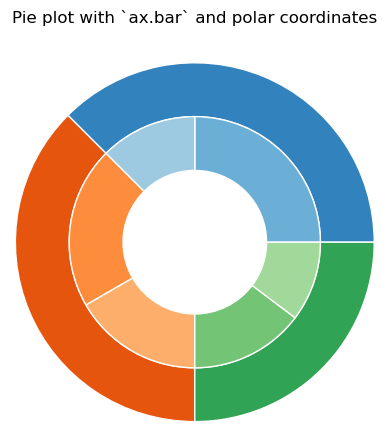

In [34]:
fig, ax = plt.subplots(subplot_kw = dict(projection = "polar"))

size = 0.3
# vals = values
vals = np.array([[90., 45.], [75., 60.], [53., 37.]])

# Normalize vals to 2pi
valsnorm = vals / np.sum(vals) * 2 * np.pi

# Obtain the ordinates of the bar edges
valsleft = np.cumsum(np.append(0, valsnorm.flatten()[:-1])).reshape(vals.shape)

cmap = plt.colormaps["tab20c"]
outer_colors = cmap(np.arange(3)*4)
inner_colors = cmap([1, 2, 5, 6, 9, 10])

ax.bar(x = valsleft[:, 0], 
    width = valsnorm.sum(axis=1), bottom = 1-size, height=size,
    color = outer_colors, edgecolor = 'w', linewidth = 1, align = 'edge')

ax.bar(x = valsleft.flatten(),
    width = valsnorm.flatten(), bottom = 1-2*size, height=size,
    color = inner_colors, edgecolor = 'w', linewidth = 1, align = 'edge')

ax.set(title="Pie plot with `ax.bar` and polar coordinates")
ax.set_axis_off()
plt.show()

In [35]:
valsleft

array([[0.        , 1.57079633],
       [2.35619449, 3.66519143],
       [4.71238898, 5.63741348]])

### Heart Rates

#### `heart_rate`

In [36]:
HR = pd.read_json("p01/fitbit/heart_rate.json")
HR['date'] = HR['dateTime'].dt.date
HR

,dateTime,value,date
0,2019-11-01 00:00:05,"{'bpm': 54, 'confidence': 3}",2019-11-01
1,2019-11-01 00:00:10,"{'bpm': 52, 'confidence': 3}",2019-11-01
2,2019-11-01 00:00:20,"{'bpm': 51, 'confidence': 3}",2019-11-01
3,2019-11-01 00:00:25,"{'bpm': 52, 'confidence': 3}",2019-11-01
4,2019-11-01 00:00:30,"{'bpm': 51, 'confidence': 3}",2019-11-01
...,...,...,...
1573160,2020-03-31 23:59:18,"{'bpm': 55, 'confidence': 3}",2020-03-31
1573161,2020-03-31 23:59:23,"{'bpm': 54, 'confidence': 3}",2020-03-31
1573162,2020-03-31 23:59:33,"{'bpm': 56, 'confidence': 3}",2020-03-31
1573163,2020-03-31 23:59:48,"{'bpm': 56, 'confidence': 3}",2020-03-31


In [37]:
HR = (HR.join(pd.json_normalize(HR['value']))
        .drop('value', axis=1)
        .rename(columns={'bpm':'hr_bpm'}))
HR

,dateTime,date,hr_bpm,confidence
0,2019-11-01 00:00:05,2019-11-01,54,3
1,2019-11-01 00:00:10,2019-11-01,52,3
2,2019-11-01 00:00:20,2019-11-01,51,3
3,2019-11-01 00:00:25,2019-11-01,52,3
4,2019-11-01 00:00:30,2019-11-01,51,3
...,...,...,...,...
1573160,2020-03-31 23:59:18,2020-03-31,55,3
1573161,2020-03-31 23:59:23,2020-03-31,54,3
1573162,2020-03-31 23:59:33,2020-03-31,56,3
1573163,2020-03-31 23:59:48,2020-03-31,56,3


#### `resting_heart_rate`

In [38]:
RHR = pd.read_json("p01/fitbit/resting_heart_rate.json")
RHR = RHR.rename(columns={"value": "rhr"})

In [39]:
RHR

,dateTime,rhr
0,2019-11-01,"{'date': '11/01/19', 'value': 53.74107360839844, 'error': 6.7911224365234375}"
1,2019-11-02,"{'date': '11/02/19', 'value': 52.881497383117676, 'error': 6.788424491882324}"
2,2019-11-03,"{'date': '11/03/19', 'value': 53.22202396392822, 'error': 6.787530899047852}"
3,2019-11-04,"{'date': '11/04/19', 'value': 54.31114101409912, 'error': 6.787234306335449}"
4,2019-11-05,"{'date': '11/05/19', 'value': 52.25911045074463, 'error': 6.787136077880859}"
...,...,...
147,2020-03-27,"{'date': '03/27/20', 'value': 50.23250770568848, 'error': 6.787087440490723}"
148,2020-03-28,"{'date': '03/28/20', 'value': 51.125173568725586, 'error': 6.787087440490723}"
149,2020-03-29,"{'date': '03/29/20', 'value': 53.07050037384033, 'error': 6.787087440490723}"
150,2020-03-30,"{'date': '03/30/20', 'value': 52.17508316040039, 'error': 6.787087440490723}"


In [40]:
RHR = (RHR.join(pd.json_normalize(RHR['rhr']))
          .drop(["rhr", "date"], axis=1)
          .rename(columns={
              "value": "resting_hr",
              "error": "error_std"}))

RHR

,dateTime,resting_hr,error_std
0,2019-11-01,53.741074,6.791122
1,2019-11-02,52.881497,6.788424
2,2019-11-03,53.222024,6.787531
3,2019-11-04,54.311141,6.787234
4,2019-11-05,52.259110,6.787136
...,...,...,...
147,2020-03-27,50.232508,6.787087
148,2020-03-28,51.125174,6.787087
149,2020-03-29,53.070500,6.787087
150,2020-03-30,52.175083,6.787087


#### `time_in_heart_rate_zones`

In [41]:
hrz_in_mins = pd.read_json("p01/fitbit/time_in_heart_rate_zones.json")
hrz_in_mins

,dateTime,value
0,2019-11-01,"{'valuesInZones': {'BELOW_DEFAULT_ZONE_1': 1254.0, 'IN_DEFAULT_ZONE_1': 164.0, 'IN_DEFAULT_ZONE_3': 0.0, 'IN_DEFAULT_ZONE_2': 3.0}}"
1,2019-11-02,"{'valuesInZones': {'IN_DEFAULT_ZONE_2': 0.0, 'IN_DEFAULT_ZONE_3': 0.0, 'IN_DEFAULT_ZONE_1': 137.0, 'BELOW_DEFAULT_ZONE_1': 1262.0}}"
2,2019-11-03,"{'valuesInZones': {'IN_DEFAULT_ZONE_3': 0.0, 'IN_DEFAULT_ZONE_1': 141.0, 'IN_DEFAULT_ZONE_2': 0.0, 'BELOW_DEFAULT_ZONE_1': 1218.0}}"
3,2019-11-04,"{'valuesInZones': {'IN_DEFAULT_ZONE_1': 100.0, 'BELOW_DEFAULT_ZONE_1': 1315.0, 'IN_DEFAULT_ZONE_3': 0.0, 'IN_DEFAULT_ZONE_2': 0.0}}"
4,2019-11-05,"{'valuesInZones': {'IN_DEFAULT_ZONE_2': 7.0, 'IN_DEFAULT_ZONE_3': 12.0, 'IN_DEFAULT_ZONE_1': 94.0, 'BELOW_DEFAULT_ZONE_1': 1300.0}}"
...,...,...
147,2020-03-27,"{'valuesInZones': {'BELOW_DEFAULT_ZONE_1': 1347.0, 'IN_DEFAULT_ZONE_2': 3.0, 'IN_DEFAULT_ZONE_1': 82.0, 'IN_DEFAULT_ZONE_3': 0.0}}"
148,2020-03-28,"{'valuesInZones': {'BELOW_DEFAULT_ZONE_1': 1232.0, 'IN_DEFAULT_ZONE_1': 173.0, 'IN_DEFAULT_ZONE_2': 5.0, 'IN_DEFAULT_ZONE_3': 0.0}}"
149,2020-03-29,"{'valuesInZones': {'BELOW_DEFAULT_ZONE_1': 1319.0, 'IN_DEFAULT_ZONE_1': 49.0, 'IN_DEFAULT_ZONE_2': 0.0, 'IN_DEFAULT_ZONE_3': 0.0}}"
150,2020-03-30,"{'valuesInZones': {'BELOW_DEFAULT_ZONE_1': 1384.0, 'IN_DEFAULT_ZONE_2': 2.0, 'IN_DEFAULT_ZONE_1': 23.0, 'IN_DEFAULT_ZONE_3': 0.0}}"


In [42]:
## Column names following the sequence
col_names = ['dateTime', 
    'HRZ_oor_in_minutes', 'HRZ_fb_in_minutes', 
    'HRZ_peak_in_minutes', 'HRZ_cardio_in_minutes']

hrz_in_mins = (hrz_in_mins
   .join(pd.json_normalize(hrz_in_mins['value']))
   .drop('value', axis=1))
hrz_in_mins.columns = col_names

hrz_in_mins

,dateTime,HRZ_oor_in_minutes,HRZ_fb_in_minutes,HRZ_peak_in_minutes,HRZ_cardio_in_minutes
0,2019-11-01,1254.0,164.0,0.0,3.0
1,2019-11-02,1262.0,137.0,0.0,0.0
2,2019-11-03,1218.0,141.0,0.0,0.0
3,2019-11-04,1315.0,100.0,0.0,0.0
4,2019-11-05,1300.0,94.0,12.0,7.0
...,...,...,...,...,...
147,2020-03-27,1347.0,82.0,0.0,3.0
148,2020-03-28,1232.0,173.0,0.0,5.0
149,2020-03-29,1319.0,49.0,0.0,0.0
150,2020-03-30,1384.0,23.0,0.0,2.0


In [59]:
hrz_in_mins.sample(10)

,dateTime,HRZ_oor_in_minutes,HRZ_fb_in_minutes,HRZ_peak_in_minutes,HRZ_cardio_in_minutes
66,2020-01-06,1202.0,73.0,0.0,0.0
57,2019-12-28,1368.0,53.0,0.0,0.0
52,2019-12-23,1309.0,107.0,1.0,7.0
43,2019-12-14,1316.0,116.0,0.0,1.0
111,2020-02-20,1355.0,42.0,0.0,2.0
103,2020-02-12,1340.0,67.0,0.0,6.0
112,2020-02-21,1260.0,121.0,15.0,12.0
4,2019-11-05,1300.0,94.0,12.0,7.0
3,2019-11-04,1315.0,100.0,0.0,0.0
74,2020-01-14,1187.0,114.0,21.0,16.0


In [147]:
hrz_in_mins.sort_values('HRZ_fb_in_minutes', ascending=False)

,dateTime,HRZ_oor_in_minutes,HRZ_fb_in_minutes,HRZ_peak_in_minutes,HRZ_cardio_in_minutes
120,2020-02-29,1051.0,328.0,0.0,10.0
121,2020-03-01,1085.0,285.0,0.0,2.0
97,2020-02-06,1108.0,244.0,17.0,56.0
118,2020-02-27,1121.0,223.0,23.0,45.0
51,2019-12-22,1199.0,203.0,0.0,7.0
...,...,...,...,...,...
134,2020-03-14,1280.0,32.0,15.0,11.0
131,2020-03-11,574.0,31.0,0.0,0.0
59,2019-12-30,1087.0,29.0,0.0,0.0
150,2020-03-30,1384.0,23.0,0.0,2.0


In [149]:
hrz_in_mins.describe().T

,count,mean,min,25%,50%,75%,max,std
dateTime,152,2020-01-15 12:00:00,2019-11-01 00:00:00,2019-12-08 18:00:00,2020-01-15 12:00:00,2020-02-22 06:00:00,2020-03-31 00:00:00,NaN
HRZ_oor_in_minutes,152.0,1263.927632,574.0,1238.25,1297.0,1332.5,1384.0,107.84101
HRZ_fb_in_minutes,152.0,99.447368,22.0,66.0,92.0,122.0,328.0,48.661255
HRZ_peak_in_minutes,152.0,3.473684,0.0,0.0,0.0,1.0,38.0,7.947633
HRZ_cardio_in_minutes,152.0,5.526316,0.0,0.0,2.0,6.0,56.0,9.592317


### `XX_minutes`

#### `sedentary_minutes`

In [43]:
sms = pd.read_json("p01/fitbit/sedentary_minutes.json")
sms = sms.rename(columns={'value': 'sedentary_minutes'})
sms

,dateTime,sedentary_minutes
0,2019-11-01,636
1,2019-11-02,709
2,2019-11-03,648
3,2019-11-04,760
4,2019-11-05,737
...,...,...
147,2020-03-27,821
148,2020-03-28,679
149,2020-03-29,840
150,2020-03-30,842


#### `lightly_active_minutes`

In [44]:
lams = pd.read_json("p01/fitbit/lightly_active_minutes.json")
lams = lams.rename(columns={'value': 'lightly_active_minutes'})
lams

,dateTime,lightly_active_minutes
0,2019-11-01,245
1,2019-11-02,202
2,2019-11-03,262
3,2019-11-04,230
4,2019-11-05,263
...,...,...
147,2020-03-27,181
148,2020-03-28,207
149,2020-03-29,145
150,2020-03-30,161


#### `moderately_active_minutes`

In [45]:
mams = pd.read_json("p01/fitbit/moderately_active_minutes.json")
mams = mams.rename(columns={'value': 'moderatively_active_minutes'})
mams

,dateTime,moderatively_active_minutes
0,2019-11-01,58
1,2019-11-02,43
2,2019-11-03,63
3,2019-11-04,23
4,2019-11-05,22
...,...,...
147,2020-03-27,28
148,2020-03-28,69
149,2020-03-29,19
150,2020-03-30,6


#### `very_active_minutes`

In [46]:
vams = pd.read_json("p01/fitbit/very_active_minutes.json")
vams = vams.rename(columns={'value': 'very_active_minutes'})
vams

,dateTime,very_active_minutes
0,2019-11-01,72
1,2019-11-02,56
2,2019-11-03,45
3,2019-11-04,28
4,2019-11-05,56
...,...,...
147,2020-03-27,65
148,2020-03-28,83
149,2020-03-29,22
150,2020-03-30,8


### `steps`

In [47]:
steps = pd.read_json("p01/fitbit/steps.json")
steps['date'] = steps['dateTime'].dt.date
steps

,dateTime,value,date
0,2019-11-01 00:00:00,0,2019-11-01
1,2019-11-01 00:01:00,0,2019-11-01
2,2019-11-01 00:02:00,0,2019-11-01
3,2019-11-01 00:03:00,0,2019-11-01
4,2019-11-01 00:04:00,0,2019-11-01
...,...,...,...
218831,2020-03-31 23:55:00,0,2020-03-31
218832,2020-03-31 23:56:00,0,2020-03-31
218833,2020-03-31 23:57:00,0,2020-03-31
218834,2020-03-31 23:58:00,0,2020-03-31


In [48]:
steps_per_day = (steps.drop('dateTime', axis=1)
    .groupby('date').agg('sum').reset_index()
    .rename(columns={'date': 'dateTime', 'value':'num_steps'})
)
steps_per_day

,dateTime,num_steps
0,2019-11-01,17873
1,2019-11-02,13118
2,2019-11-03,14312
3,2019-11-04,10970
4,2019-11-05,16186
...,...,...
147,2020-03-27,11532
148,2020-03-28,16448
149,2020-03-29,6698
150,2020-03-30,4761


### `active_steps`

In [49]:
active_dfs = [steps_per_day, sms, lams, mams, vams]

active_steps = pd.concat(active_dfs, join='outer', axis=1)
active_steps = active_steps.loc[:, ~active_steps.columns.duplicated()]
active_steps

,dateTime,num_steps,sedentary_minutes,lightly_active_minutes,moderatively_active_minutes,very_active_minutes
0,2019-11-01,17873,636,245,58,72
1,2019-11-02,13118,709,202,43,56
2,2019-11-03,14312,648,262,63,45
3,2019-11-04,10970,760,230,23,28
4,2019-11-05,16186,737,263,22,56
...,...,...,...,...,...,...
147,2020-03-27,11532,821,181,28,65
148,2020-03-28,16448,679,207,69,83
149,2020-03-29,6698,840,145,19,22
150,2020-03-30,4761,842,161,6,8


In [50]:
## Visualize the trend

### `sleep`

In [51]:
sleep = pd.read_json("p01/fitbit/sleep.json")

In [52]:
sleep.shape

(155, 15)

In [53]:
sleep.head(1)

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,levels,mainSleep
0,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,25800000,0,378,52,0,430,97,stages,0,"{'summary': {'deep': {'count': 2, 'minutes': 36, 'thirtyDayAvgMinutes': 40}, 'wake': {'count': 26, 'minutes': 52, 'thirtyDayAvgMinutes': 42}, 'light': {'count': 30, 'minutes': 259, 'thirtyDayAvgMinutes': 249}, 'rem': {'count': 4, 'minutes': 83, 'thirtyDayAvgMinutes': 55}}, 'data': [{'dateTime': '2019-11-02T00:09:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T00:10:00.000', 'level': 'light', 'seconds': 3570}, {'dateTime': '2019-11-02T01:09:30.000', 'level': 'deep', 'seconds': 1140}, {'dateTime': '2019-11-02T01:28:30.000', 'level': 'light', 'seconds': 210}, {'dateTime': '2019-11-02T01:32:00.000', 'level': 'rem', 'seconds': 930}, {'dateTime': '2019-11-02T01:47:30.000', 'level': 'light', 'seconds': 2580}, {'dateTime': '2019-11-02T02:30:30.000', 'level': 'rem', 'seconds': 1350}, {'dateTime': '2019-11-02T02:53:00.000', 'level': 'light', 'seconds': 720}, {'dateTime': '2019-11-02T03:05:00.000', 'level': 'rem', 'seconds': 1200}, {'dateTime': '2019-11-02T03:25:00.000', 'level': 'light', 'seconds': 2580}, {'dateTime': '2019-11-02T04:08:00.000', 'level': 'wake', 'seconds': 510}, {'dateTime': '2019-11-02T04:16:30.000', 'level': 'light', 'seconds': 2250}, {'dateTime': '2019-11-02T04:54:00.000', 'level': 'wake', 'seconds': 240}, {'dateTime': '2019-11-02T04:58:00.000', 'level': 'light', 'seconds': 2970}, {'dateTime': '2019-11-02T05:47:30.000', 'level': 'rem', 'seconds': 1500}, {'dateTime': '2019-11-02T06:12:30.000', 'level': 'light', 'seconds': 1350}, {'dateTime': '20...",True


In [54]:
sleep = sleep.join(
    pd.json_normalize(sleep['levels'])
).drop(['levels', 'shortData'], axis=1)
sleep.head(1)

,logId,dateOfSleep,startTime,endTime,duration,minutesToFallAsleep,minutesAsleep,minutesAwake,minutesAfterWakeup,timeInBed,efficiency,type,infoCode,mainSleep,data,summary.deep.count,summary.deep.minutes,summary.deep.thirtyDayAvgMinutes,summary.wake.count,summary.wake.minutes,summary.wake.thirtyDayAvgMinutes,summary.light.count,summary.light.minutes,summary.light.thirtyDayAvgMinutes,summary.rem.count,summary.rem.minutes,summary.rem.thirtyDayAvgMinutes
0,24486013387,2019-11-02,2019-11-02 00:09:30,2019-11-02T07:19:30.000,25800000,0,378,52,0,430,97,stages,0,True,"[{'dateTime': '2019-11-02T00:09:30.000', 'level': 'wake', 'seconds': 30}, {'dateTime': '2019-11-02T00:10:00.000', 'level': 'light', 'seconds': 3570}, {'dateTime': '2019-11-02T01:09:30.000', 'level': 'deep', 'seconds': 1140}, {'dateTime': '2019-11-02T01:28:30.000', 'level': 'light', 'seconds': 210}, {'dateTime': '2019-11-02T01:32:00.000', 'level': 'rem', 'seconds': 930}, {'dateTime': '2019-11-02T01:47:30.000', 'level': 'light', 'seconds': 2580}, {'dateTime': '2019-11-02T02:30:30.000', 'level': 'rem', 'seconds': 1350}, {'dateTime': '2019-11-02T02:53:00.000', 'level': 'light', 'seconds': 720}, {'dateTime': '2019-11-02T03:05:00.000', 'level': 'rem', 'seconds': 1200}, {'dateTime': '2019-11-02T03:25:00.000', 'level': 'light', 'seconds': 2580}, {'dateTime': '2019-11-02T04:08:00.000', 'level': 'wake', 'seconds': 510}, {'dateTime': '2019-11-02T04:16:30.000', 'level': 'light', 'seconds': 2250}, {'dateTime': '2019-11-02T04:54:00.000', 'level': 'wake', 'seconds': 240}, {'dateTime': '2019-11-02T04:58:00.000', 'level': 'light', 'seconds': 2970}, {'dateTime': '2019-11-02T05:47:30.000', 'level': 'rem', 'seconds': 1500}, {'dateTime': '2019-11-02T06:12:30.000', 'level': 'light', 'seconds': 1350}, {'dateTime': '2019-11-02T06:35:00.000', 'level': 'deep', 'seconds': 1140}, {'dateTime': '2019-11-02T06:54:00.000', 'level': 'light', 'seconds': 1080}, {'dateTime': '2019-11-02T07:12:00.000', 'level': 'wake', 'seconds': 450}]",2,36,40,26,52,42,30,259,249,4,83,55


In [55]:
sleep.shape

(155, 27)

In [56]:
pd.json_normalize(sleep['data'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
0,"{'dateTime': '2019-11-02T00:09:30.000', 'level': 'wake', 'seconds': 30}","{'dateTime': '2019-11-02T00:10:00.000', 'level': 'light', 'seconds': 3570}","{'dateTime': '2019-11-02T01:09:30.000', 'level': 'deep', 'seconds': 1140}","{'dateTime': '2019-11-02T01:28:30.000', 'level': 'light', 'seconds': 210}","{'dateTime': '2019-11-02T01:32:00.000', 'level': 'rem', 'seconds': 930}","{'dateTime': '2019-11-02T01:47:30.000', 'level': 'light', 'seconds': 2580}","{'dateTime': '2019-11-02T02:30:30.000', 'level': 'rem', 'seconds': 1350}","{'dateTime': '2019-11-02T02:53:00.000', 'level': 'light', 'seconds': 720}","{'dateTime': '2019-11-02T03:05:00.000', 'level': 'rem', 'seconds': 1200}","{'dateTime': '2019-11-02T03:25:00.000', 'level': 'light', 'seconds': 2580}","{'dateTime': '2019-11-02T04:08:00.000', 'level': 'wake', 'seconds': 510}","{'dateTime': '2019-11-02T04:16:30.000', 'level': 'light', 'seconds': 2250}","{'dateTime': '2019-11-02T04:54:00.000', 'level': 'wake', 'seconds': 240}","{'dateTime': '2019-11-02T04:58:00.000', 'level': 'light', 'seconds': 2970}","{'dateTime': '2019-11-02T05:47:30.000', 'level': 'rem', 'seconds': 1500}","{'dateTime': '2019-11-02T06:12:30.000', 'level': 'light', 'seconds': 1350}","{'dateTime': '2019-11-02T06:35:00.000', 'level': 'deep', 'seconds': 1140}","{'dateTime': '2019-11-02T06:54:00.000', 'level': 'light', 'seconds': 1080}","{'dateTime': '2019-11-02T07:12:00.000', 'level': 'wake', 'seconds': 450}",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,"{'dateTime': '2019-11-03T00:32:00.000', 'level': 'light', 'seconds': 450}","{'dateTime': '2019-11-03T00:39:30.000', 'level': 'wake', 'seconds': 390}","{'dateTime': '2019-11-03T00:46:00.000', 'level': 'light', 'seconds': 930}","{'dateTime': '2019-11-03T01:01:30.000', 'level': 'wake', 'seconds': 780}","{'dateTime': '2019-11-03T01:14:30.000', 'level': 'light', 'seconds': 1650}","{'dateTime': '2019-11-03T01:42:00.000', 'level': 'deep', 'seconds': 1050}","{'dateTime': '2019-11-03T01:59:30.000', 'level': 'light', 'seconds': 2430}","{'dateTime': '2019-11-03T02:40:00.000', 'level': 'rem', 'seconds': 510}","{'dateTime': '2019-11-03T02:48:30.000', 'level': 'light', 'seconds': 4530}","{'dateTime': '2019-11-03T04:04:00.000', 'level': 'rem', 'seconds': 1050}","{'dateTime': '2019-11-03T04:21:30.000', 'level': 'light', 'seconds': 3360}","{'dateTime': '2019-11-03T05:17:30.000', 'level': 'deep', 'seconds': 1290}","{'dateTime': '2019-11-03T05:39:00.000', 'level': 'light', 'seconds': 270}","{'dateTime': '2019-11-03T05:43:30.000', 'level': 'rem', 'seconds': 360}","{'dateTime': '2019-11-03T05:49:30.000', 'level': 'light', 'seconds': 3120}","{'dateTime': '2019-11-03T06:41:30.000', 'level': 'rem', 'seconds': 1170}","{'dateTime': '2019-11-03T07:01:00.000', 'level': 'wake', 'seconds': 300}","{'dateTime': '2019-11-03T07:06:00.000', 'level': 'light', 'seconds': 1710}",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,"{'dateTime': '2019-11-03T23:55:30.000', 'level': 'light', 'seconds': 690}","{'dateTime': '2019-11-04T00:07:00.000', 'level': 'deep', 'seconds': 1950}","{'dateTime': '2019-11-04T00:39:30.000', 'level': 'light', 'seconds': 120}","{'dateTime': '2019-11-04T00:41:30.000', 'level': 'wake', 'seconds': 210}","{'dateTime': '2019-11-04T00:45:00.000', 'level': 'light', 'seconds': 5010}","{'dateTime': '2019-11-04T02:08:30.000', 'level': 'rem', 'seconds': 1290}","{'dateTime': '2019-11-04T02:30:00.000', 'level': 'light', 'seconds': 2520}","{'dateTime': '2019-11-04T03:12:00.000', 'level': 'deep', 'seconds': 360}","{'dateTime': '2019-11-04T03:18:00.000', 'level': 'light', 'seconds': 6240}","{'dateTime': '2019-11-04T05:02:00.000', 'level': 'rem', 'seconds': 270}","{'dateTime': '2019-11-04T05:06:30.000', 'level': 'light', 'seconds': 1710}","{'dateTime': '2019-11-04T05:35:00.000', 'level': 'rem', 'seconds': 300}","{'dateTime': '2019-11-04T05:40

In [57]:
## How to:
# (1) Make each `data` to_dict of list,
# (2) and by chance get that format into Tableau

In [134]:
sleep_chr = pd.DataFrame(sleep['data'].explode('data'))

sleep_chr = (sleep_chr
    .merge(pd.json_normalize(sleep_chr['data']), 
           left_index=True, right_index=True)
    .drop('data', axis=1))

sleep_chr

## We've done the parsing, at least for one row.
## Now what to do from here? How can we make it
## readable in Tableau while preserving the
## DataFrame as a whole row?

,dateTime,level,seconds
0,2019-11-02T00:09:30.000,wake,30
1,2019-11-02T00:10:00.000,light,3570
2,2019-11-02T01:09:30.000,deep,1140
3,2019-11-02T01:28:30.000,light,210
4,2019-11-02T01:32:00.000,rem,930
...,...,...,...
2941,2020-03-31T05:56:00.000,light,2100
2942,2020-03-31T06:31:00.000,rem,270
2943,2020-03-31T06:35:30.000,light,450
2944,2020-03-31T06:43:00.000,rem,420


In [ ]:
sleep_chr.to_dict('list')

### `sleep_score`

In [135]:
sleep_score = pd.read_csv("p01/fitbit/sleep_score.csv")

In [136]:
sleep_score

,timestamp,sleep_log_entry_id,overall_score,composition_score,revitalization_score,duration_score,deep_sleep_in_minutes,resting_heart_rate,restlessness
0,2019-11-01T06:29:30Z,24472394143,76,18,20,38,27,53,0.053635
1,2019-11-02T07:19:30Z,24486013387,79,20,22,37,36,53,0.078978
2,2019-11-03T07:34:30Z,24497341340,71,16,17,38,38,52,0.093491
3,2019-11-04T06:35:00Z,24507914069,68,15,15,38,37,53,0.064851
4,2019-11-05T06:25:00Z,24521896102,73,15,22,36,26,54,0.093185
...,...,...,...,...,...,...,...,...,...
145,2020-03-26T07:52:00Z,26479066869,76,16,20,40,54,50,0.058306
146,2020-03-27T08:12:30Z,26491780871,72,19,20,33,59,50,0.096961
147,2020-03-28T07:46:00Z,26502379603,67,16,14,37,5,50,0.087126
148,2020-03-29T08:40:30Z,26516647751,62,16,14,32,55,51,0.056962


## `googledocs`

### `reporting`

In [137]:
reporting = pd.read_csv("p01/googledocs/reporting.csv")

In [138]:
reporting

,date,timestamp,meals,weight,glasses_of_fluid,alcohol_consumed
0,06/11/2019,06/12/2019 21:58:30,"Breakfast, Dinner",100.0,7,No
1,09/11/2019,09/12/2019 21:17:02,"Breakfast, Evening",100.0,6,No
2,10/11/2019,10/12/2019 21:52:58,"Breakfast, Lunch, Dinner",100.0,9,No
3,11/11/2019,11/11/2019 22:36:30,"Breakfast, Dinner",100.0,5,No
4,12/11/2019,13/11/2019 00:15:47,"Breakfast, Lunch, Dinner",100.0,7,No
...,...,...,...,...,...,...
104,27/03/2020,28/03/2020 00:52:18,"Breakfast, Dinner",NaN,8,No
105,28/03/2020,29/03/2020 00:33:43,"Breakfast, Dinner",NaN,8,No
106,29/03/2020,01/03/2020 23:13:54,"Breakfast, Lunch, Dinner",NaN,8,No
107,29/03/2020,30/03/2020 09:23:46,"Breakfast, Dinner, Evening",NaN,7,No


## `pmsys`

### `injury`

In [139]:
injury = pd.read_csv("p01/pmsys/injury.csv")

In [140]:
injury

,effective_time_frame,injuries
0,2019-11-07T06:39:48.428Z,{}
1,2019-11-11T13:47:05.617Z,{}
2,2019-11-18T08:28:53.208Z,{}
3,2019-11-25T08:10:11.478Z,{}
4,2019-12-02T08:10:19.841Z,{}
5,2019-12-09T08:17:02.463Z,{}
6,2019-12-16T08:16:54.735Z,{}
7,2019-12-25T11:04:39.750Z,{}
8,2019-12-30T08:17:02.019Z,{}
9,2020-01-04T16:20:58.607Z,{}


### `srpe`

In [141]:
srpe = pd.read_csv("p01/pmsys/srpe.csv")

In [142]:
srpe

,end_date_time,activity_names,perceived_exertion,duration_min
0,2019-11-05T22:51:54.710Z,"['individual', 'running']",7,30
1,2019-11-11T21:15:15.092Z,"['individual', 'running']",6,30
2,2019-11-14T21:00:53.000Z,"['team', 'soccer']",7,60
3,2019-11-18T21:34:44.995Z,"['individual', 'endurance']",6,50
4,2019-11-21T21:06:25.146Z,"['team', 'soccer']",6,70
5,2019-11-23T09:34:50.739Z,"['individual', 'running']",8,30
6,2019-11-26T08:03:56.794Z,"['individual', 'running']",7,40
7,2019-11-28T21:07:17.918Z,"['team', 'soccer']",6,60
8,2019-12-03T08:13:07.418Z,"['individual', 'running']",6,40
9,2019-12-05T22:00:26.647Z,"['team', 'soccer']",6,60


### `wellness`

In [143]:
wellness = pd.read_csv("p01/pmsys/wellness.csv")

In [144]:
wellness

,effective_time_frame,fatigue,mood,readiness,sleep_duration_h,sleep_quality,soreness,soreness_area,stress
0,2019-11-01T08:31:40.751Z,2,3,5,6,3,2,[12921003],3
1,2019-11-02T10:00:01.229Z,2,3,6,6,3,2,[12921003],3
2,2019-11-03T14:28:03.263Z,3,3,8,6,3,3,[],3
3,2019-11-04T07:05:28.429Z,3,3,8,6,3,3,[],3
4,2019-11-05T06:13:35.998Z,3,3,8,5,3,3,[],3
...,...,...,...,...,...,...,...,...,...
133,2020-03-25T11:25:45.031Z,3,3,8,5,2,3,[],3
134,2020-03-27T21:44:34.942Z,2,2,6,5,2,3,[],2
135,2020-03-28T12:07:09.493Z,3,3,8,6,3,3,[],3
136,2020-03-29T08:02:16.282Z,3,3,8,5,3,3,[],3
